# Visualization challenge for week 1
Task: Replicating three plots from https://www.kaggle.com/bulentsiyah/data-science-and-visualization-exercise/data





Google colab of this notebook: https://colab.research.google.com/drive/1XP5ceNCOBzX9epXPrflUojTWMBIJUWe6?usp=sharing

By: Christian Vadillo

Loading libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget

from pathlib import Path

For plotly examples, the recommendation is to use version 4.7 or upper. This block will install or upgrade plotly if it is necessary

In [ ]:
def restart_runtime():
  os.kill(os.getpid(), 9)

try:
  import plotly
  version = plotly.__version__[:3]
  print("Current version: ", version)
  if float(version) < 4.7:
    !pip install plotly --upgrade
    # This will stop the kernel for reloading the new module
    restart_runtime()
except Exception as e:
  !pip install plotly


# Loading data
Data src: https://www.kaggle.com/mylesoneill/world-university-rankings

Github src for downloading raw data: [github.com/arnaudbenard](https://github.com/arnaudbenard/university-ranking/blob/master/timesData.csv)

In [4]:
wget 'https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv'

--2020-09-03 21:41:02--  https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268231 (262K) [text/plain]
Saving to: ‘timesData.csv’

timesData.csv       100%[===================>] 261.94K  --.-KB/s    in 0.04s   

2020-09-03 21:41:02 (5.86 MB/s) - ‘timesData.csv’ saved [268231/268231]



In [5]:
path = Path('/content')

In [6]:
df = pd.read_csv(path/'timesData.csv')
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


# 1. Bubble plot [Plotly]

In [7]:
import plotly.express as px

# data preparation
df2016 = df[df.year == 2016].iloc[:20, :]
num_students_size  = [float(str(each).replace(',', '.')) for each in df2016.num_students]
international_color = [float(str(each)) for each in df2016.international]


fig = px.scatter(df2016, x="world_rank", y='teaching',
	         size=num_students_size, color=international_color,
           hover_name="university_name", size_max=80,
           opacity=.7)

fig.update_traces(mode='markers', marker=dict(sizemode='area', line_width=4))

fig.update_layout(
    title='Top Universities in the World (2016)',
    xaxis=dict(
        title='World Rank',
    ),
    yaxis=dict(
        title='University Score',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

Data src: https://archive.ics.uci.edu/ml/datasets/adult

Github for raw data: [github.com/saravrajavelu](https://github.com/saravrajavelu/Adult-Income-Analysis/blob/master/adult.csv)

In [8]:
!wget 'https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/master/adult.csv'

--2020-09-03 21:41:03--  https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/master/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5326368 (5.1M) [text/plain]
Saving to: ‘adult.csv’

adult.csv           100%[===================>]   5.08M  22.7MB/s    in 0.2s    

2020-09-03 21:41:04 (22.7 MB/s) - ‘adult.csv’ saved [5326368/5326368]



In [9]:
df = pd.read_csv(path/'adult.csv', encoding='latin-1')
df = df.convert_dtypes()
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 2. Pair plot [seaborn]

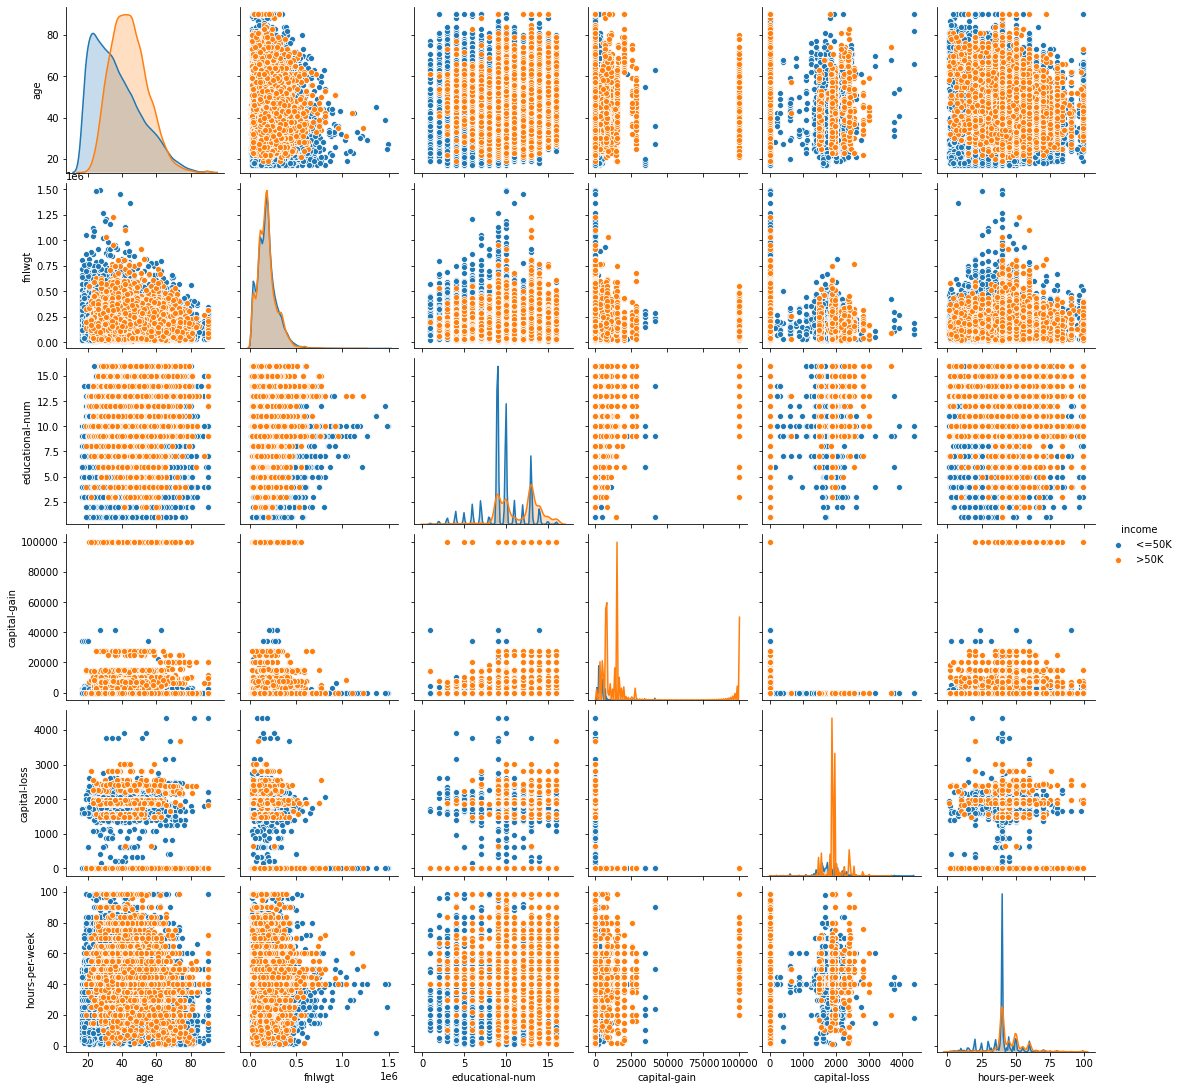

In [10]:
sns.pairplot(df, hue='income');

# 3. Histogram [Matplotlib]

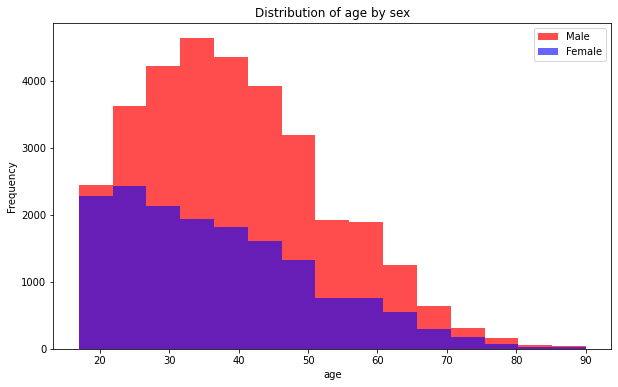

In [11]:
m = df[df['gender']=="Male"]
f = df[df['gender']=="Female"]

plt.figure(figsize=(10,6))
ax = m['age'].plot.hist(bins=15 ,color="red", alpha=0.7)
ax = f['age'].plot.hist(bins=15,color="blue", alpha=0.6)
plt.legend(['Male', 'Female'])
plt.xlabel('age')
plt.title('Distribution of age by sex');